In [174]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [175]:
train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###  Q1 Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes.

In [177]:
y_train=train_data["Survived"]
# dropping irrelevant attributes
feat=['Pclass','Sex', 'Age','SibSp','Parch','Fare','Embarked']
train_data=train_data[feat]
genders = {'male': 1, 'female': 0}
embark = {'S': 0, 'Q': 1, 'C': 2}
data=[train_data]
for d in data:
  d["Sex"] = d["Sex"].map(genders)
  d["Embarked"] = d["Embarked"].map(embark)
  d["Age"].fillna(d["Age"].mean(),inplace=True)
  d["Fare"].fillna(d["Fare"].mean(),inplace=True)
  d["Embarked"].fillna(d["Embarked"].median(),inplace=True)

In [178]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0.0
1,1,0,38.0,1,0,71.2833,2.0
2,3,0,26.0,0,0,7.9250,0.0
3,1,0,35.0,1,0,53.1000,0.0
4,3,1,35.0,0,0,8.0500,0.0


In [179]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, y_train,random_state=70,shuffle=True)

In [180]:
X_train=np.array(X_train)
y_train = np.array(y_train)


X_val=np.array(X_val)
y_val=np.array(y_val)

### Q2 Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model fitting in one step.

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('gnb', GaussianNB())])
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('gnb', GaussianNB())])
pipe.score(X_val, y_val)

0.820627802690583

### Q3 Perform Bayes classification using cross validation.

In [198]:
y_pred = pipe.predict(X_val)

y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0], dtype=int64)

In [199]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_val,y_pred )))

Model accuracy score: 0.8206


In [200]:
from sklearn.metrics import confusion_matrix
cm_gnb=confusion_matrix(y_val,y_pred)
cm_gnb

array([[114,  17],
       [ 23,  69]], dtype=int64)

<AxesSubplot:>

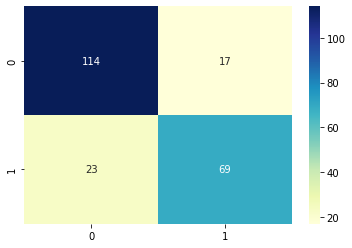

In [201]:
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='YlGnBu')

In [202]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

In [203]:
accuracy_gnb = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')

### Q4 Tabulate using relevant measures of accuracy , sensitivity, specificity

In [204]:
print("Mean Accuracy of GaussianNB: ", np.mean(accuracy_gnb))

Mean Accuracy of GaussianNB:  0.8


In [205]:
precision_gnb = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='precision')
print("Mean Precision of GaussianNB: ", np.mean(precision_gnb))

Mean Precision of GaussianNB:  0.7164714305262334


In [206]:
recall_gnb = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='recall')
print("Mean Recall of GaussianNB: ", np.mean(recall_gnb))

Mean Recall of GaussianNB:  0.7230095658832401


In [207]:
y_score = pipe.predict_proba(X_val)[:, 1]

### Visualize the ROC curve and comment on performance

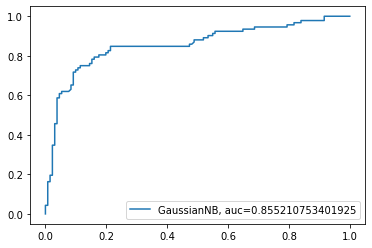

In [209]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_val,  y_score)
auc = roc_auc_score(y_val, y_score)
plt.plot(fpr,tpr,label="GaussianNB, auc="+str(auc))
plt.legend(loc=4)
plt.show()